In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from personality.constants import DATA_PATH

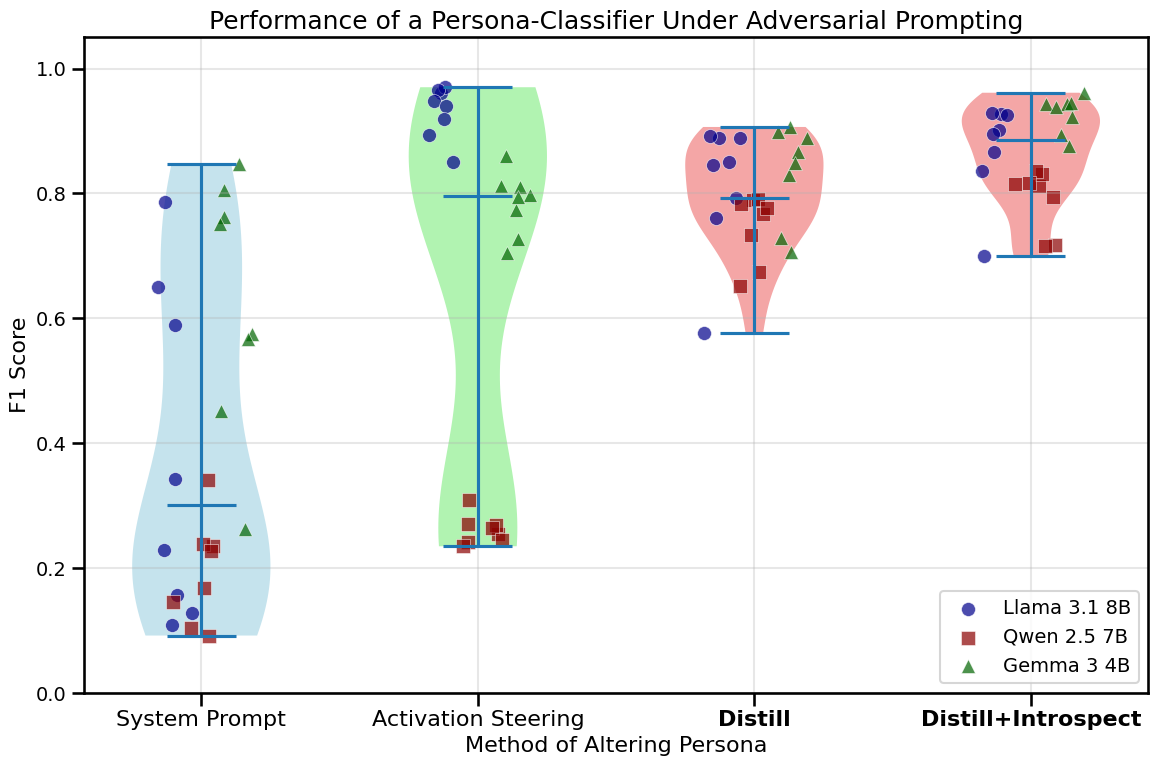

In [23]:
# Combined plot merging results from Llama and Qwen and Gemma
plt.figure(figsize=(12, 8))

# Load data for all three models
PATH_LLAMA = f"{DATA_PATH}/robustness/llama-3.1-8b-it"
f1_llama = pd.read_json(f"{PATH_LLAMA}/f1.jsonl", orient="records", lines=True)
filtered_f1_llama = f1_llama[~f1_llama["variant"].isin(["default", "all"])]

PATH_QWEN = f"{DATA_PATH}/robustness/qwen-2.5-7b-it"
f1_qwen = pd.read_json(f"{PATH_QWEN}/f1.jsonl", orient="records", lines=True)
filtered_f1_qwen = f1_qwen[~f1_qwen["variant"].isin(["default", "all"])]

PATH_GEMMA = f"{DATA_PATH}/robustness/gemma-3-4b-it"
f1_gemma = pd.read_json(f"{PATH_GEMMA}/f1.jsonl", orient="records", lines=True)
filtered_f1_gemma = f1_gemma[~f1_gemma["variant"].isin(["default", "all"])]

# Combine data from all three models
combined_f1 = pd.concat([filtered_f1_llama, filtered_f1_qwen, filtered_f1_gemma], ignore_index=True)

methods = ['prompted', 'steered', 'trained_distillation', 'trained_introspection']
method_labels = ['System Prompt', 'Activation Steering', 'Distill', 'Distill+Introspect']
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightcoral']

# Create violin plot with combined data
data_for_violinplot = [combined_f1[combined_f1['method'] == method]['score'] for method in methods]
violin_parts = plt.violinplot(data_for_violinplot, positions=range(1, len(methods) + 1), showextrema=True, showmedians=True)

# Color each violin
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)

# Add individual points with jitter, using different markers for each model
for i, method in enumerate(methods):
    # Llama data points
    method_data_llama = filtered_f1_llama[filtered_f1_llama['method'] == method]['score']
    x_position = i + 1
    x_jitter_llama = np.random.normal(-0.12, 0.04, size=len(method_data_llama))
    plt.scatter(x_position + x_jitter_llama, method_data_llama, alpha=0.7, s=100, 
               color='darkblue', edgecolors='white', linewidth=0.5, marker='o', label='Llama 3.1 8B' if i == 0 else "")
    
    # Qwen data points
    method_data_qwen = filtered_f1_qwen[filtered_f1_qwen['method'] == method]['score']
    x_jitter_qwen = np.random.normal(0, 0.04, size=len(method_data_qwen))
    plt.scatter(x_position + x_jitter_qwen, method_data_qwen, alpha=0.7, s=100, 
               color='darkred', edgecolors='white', linewidth=0.5, marker='s', label='Qwen 2.5 7B' if i == 0 else "")
    
    # Gemma data points
    method_data_gemma = filtered_f1_gemma[filtered_f1_gemma['method'] == method]['score']
    x_jitter_gemma = np.random.normal(0.12, 0.04, size=len(method_data_gemma))
    plt.scatter(x_position + x_jitter_gemma, method_data_gemma, alpha=0.7, s=100, 
               color='darkgreen', edgecolors='white', linewidth=0.5, marker='^', label='Gemma 3 4B' if i == 0 else "")

plt.ylim(0, 1.05)

# Set x-tick labels with bold formatting for Distill and Distill+Introspect
ax = plt.gca()
ax.set_xticks(range(1, len(methods) + 1))
xtick_labels = []
for i, label in enumerate(method_labels):
    if i >= 2:  # Distill and Distill+Introspect
        xtick_labels.append(label)
    else:
        xtick_labels.append(label)

ax.set_xticklabels(xtick_labels, fontsize=16)
# Make the last two labels bold
for i, label in enumerate(ax.get_xticklabels()):
    if i >= 2:  # Distill and Distill+Introspect
        label.set_fontweight('bold')

plt.xlabel('Method of Altering Persona', fontsize=16)
plt.ylabel('F1 Score', fontsize=16)
plt.title('Performance of a Persona-Classifier Under Adversarial Prompting', fontsize=18)
plt.grid(True, alpha=0.3)
plt.tick_params(axis='y', labelsize=14)
plt.legend(fontsize=14, loc='lower right')
plt.tight_layout()
plt.savefig("/workspace/PersonalityTraining/figures/robustness.png", dpi=400)
plt.show()

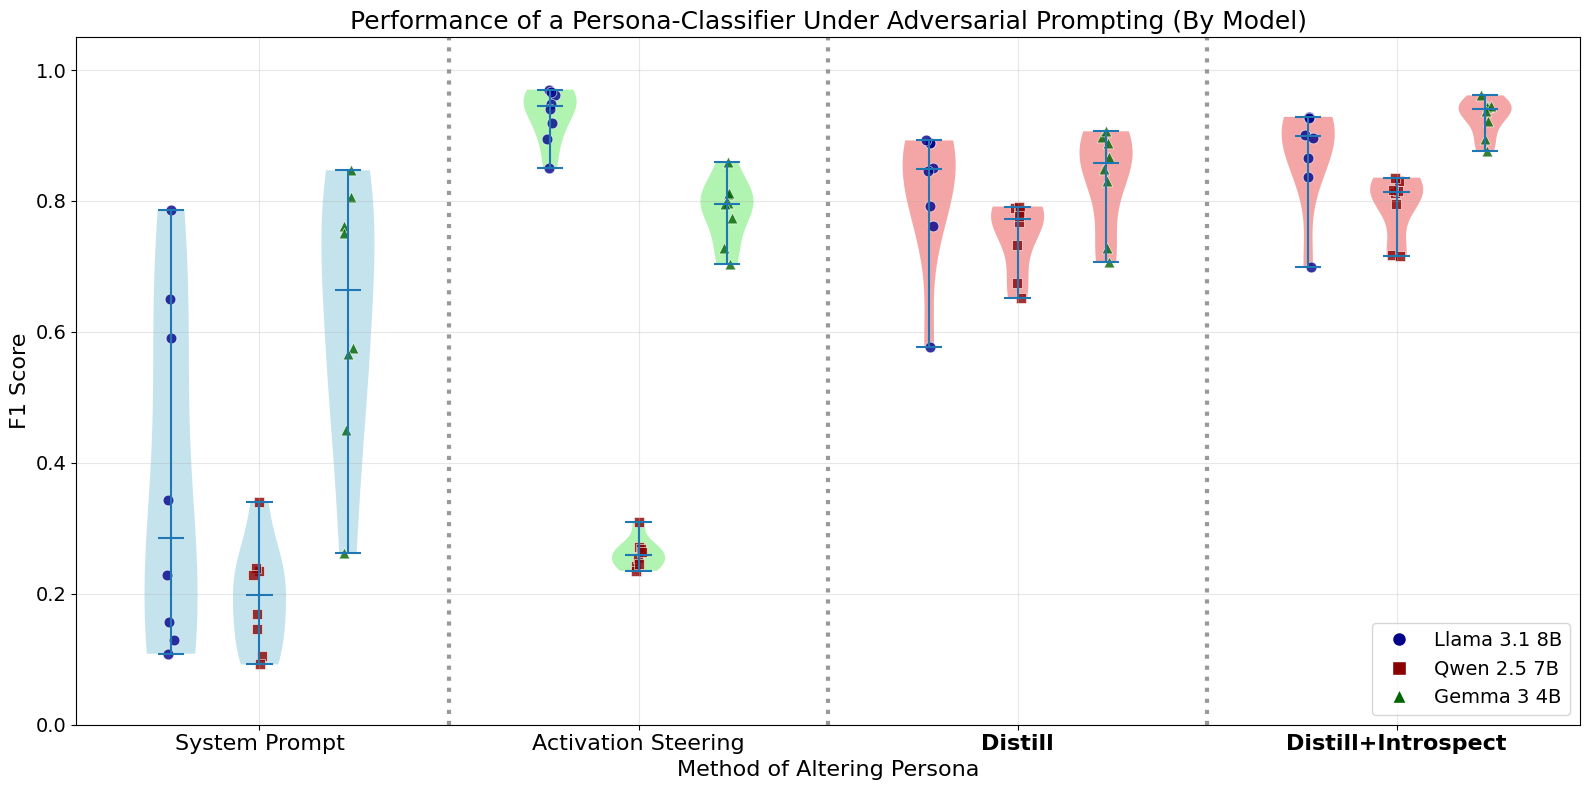

In [9]:
# Separate violin plot for each model side by side
plt.figure(figsize=(16, 8))

# Load data for all three models (same as before)
PATH_LLAMA = f"{DATA_PATH}/robustness/llama-3.1-8b-it"
f1_llama = pd.read_json(f"{PATH_LLAMA}/f1.jsonl", orient="records", lines=True)
filtered_f1_llama = f1_llama[~f1_llama["variant"].isin(["default", "all"])]

PATH_QWEN = f"{DATA_PATH}/robustness/qwen-2.5-7b-it"
f1_qwen = pd.read_json(f"{PATH_QWEN}/f1.jsonl", orient="records", lines=True)
filtered_f1_qwen = f1_qwen[~f1_qwen["variant"].isin(["default", "all"])]

PATH_GEMMA = f"{DATA_PATH}/robustness/gemma-3-4b-it"
f1_gemma = pd.read_json(f"{PATH_GEMMA}/f1.jsonl", orient="records", lines=True)
filtered_f1_gemma = f1_gemma[~f1_gemma["variant"].isin(["default", "all"])]

methods = ['prompted', 'steered', 'trained_distillation', 'trained_introspection']
method_labels = ['System Prompt', 'Activation Steering', 'Distill', 'Distill+Introspect']
method_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightcoral']
models = [filtered_f1_llama, filtered_f1_qwen, filtered_f1_gemma]
model_names = ['Llama 3.1 8B', 'Qwen 2.5 7B', 'Gemma 3 4B']

# Create positions for violins (3 models per method, with closer spacing within methods)
violin_width = 0.6
spacing_within_method = 0.7  # Reduced spacing between models within same method
spacing_between_methods = 3.0  # Increased spacing between different methods
positions = []
for i in range(len(methods)):
    base_pos = i * spacing_between_methods + 1
    for j in range(len(models)):
        positions.append(base_pos + (j - 1) * spacing_within_method)

# Prepare data for violin plot
all_data = []
all_positions = []
colors_for_violins = []

for i, method in enumerate(methods):
    for j, (model_data, model_name) in enumerate(zip(models, model_names)):
        method_data = model_data[model_data['method'] == method]['score']
        if len(method_data) > 0:
            all_data.append(method_data)
            all_positions.append(positions[i * len(models) + j])
            colors_for_violins.append(method_colors[i])

# Create violin plot
violin_parts = plt.violinplot(all_data, positions=all_positions, widths=violin_width*0.7, 
                             showextrema=True, showmedians=True)

# Color each violin
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(colors_for_violins[i])
    pc.set_alpha(0.7)

# Add individual points with jitter
point_idx = 0
for i, method in enumerate(methods):
    for j, (model_data, model_name) in enumerate(zip(models, model_names)):
        method_data = model_data[model_data['method'] == method]['score']
        if len(method_data) > 0:
            x_position = all_positions[point_idx]
            x_jitter = np.random.normal(0, 0.02, size=len(method_data))
            
            # Use different markers for each model
            if j == 0:  # Llama
                plt.scatter(x_position + x_jitter, method_data, alpha=0.8, s=60, 
                           color='darkblue', edgecolors='white', linewidth=0.5, marker='o')
            elif j == 1:  # Qwen
                plt.scatter(x_position + x_jitter, method_data, alpha=0.8, s=60, 
                           color='darkred', edgecolors='white', linewidth=0.5, marker='s')
            else:  # Gemma
                plt.scatter(x_position + x_jitter, method_data, alpha=0.8, s=60, 
                           color='darkgreen', edgecolors='white', linewidth=0.5, marker='^')
            point_idx += 1

# Add thick grey dotted lines to separate methods
method_centers = [i * spacing_between_methods + 1 for i in range(len(methods))]
for i in range(len(methods) - 1):
    separator_x = (method_centers[i] + method_centers[i + 1]) / 2
    plt.axvline(x=separator_x, color='grey', linestyle=':', alpha=0.8, linewidth=3)

plt.ylim(0, 1.05)

# Set x-tick labels
ax = plt.gca()
ax.set_xticks(method_centers)
ax.set_xticklabels(method_labels, fontsize=16)

# Make the last two labels bold
for i, label in enumerate(ax.get_xticklabels()):
    if i >= 2:  # Distill and Distill+Introspect
        label.set_fontweight('bold')

# Add model labels as legend with correct colors and markers
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='darkblue', 
                         markersize=10, label='Llama 3.1 8B', markeredgecolor='white'),
                   Line2D([0], [0], marker='s', color='w', markerfacecolor='darkred', 
                         markersize=10, label='Qwen 2.5 7B', markeredgecolor='white'),
                   Line2D([0], [0], marker='^', color='w', markerfacecolor='darkgreen', 
                         markersize=10, label='Gemma 3 4B', markeredgecolor='white')]

plt.xlabel('Method of Altering Persona', fontsize=16)
plt.ylabel('F1 Score', fontsize=16)
plt.title('Performance of a Persona-Classifier Under Adversarial Prompting (By Model)', fontsize=18)
plt.grid(True, alpha=0.3)
plt.tick_params(axis='y', labelsize=14)
plt.legend(handles=legend_elements, fontsize=14, loc='lower right')
plt.tight_layout()
# plt.savefig("/workspace/PersonalityTraining/figures/robustness_by_model.png", dpi=400)
plt.show()

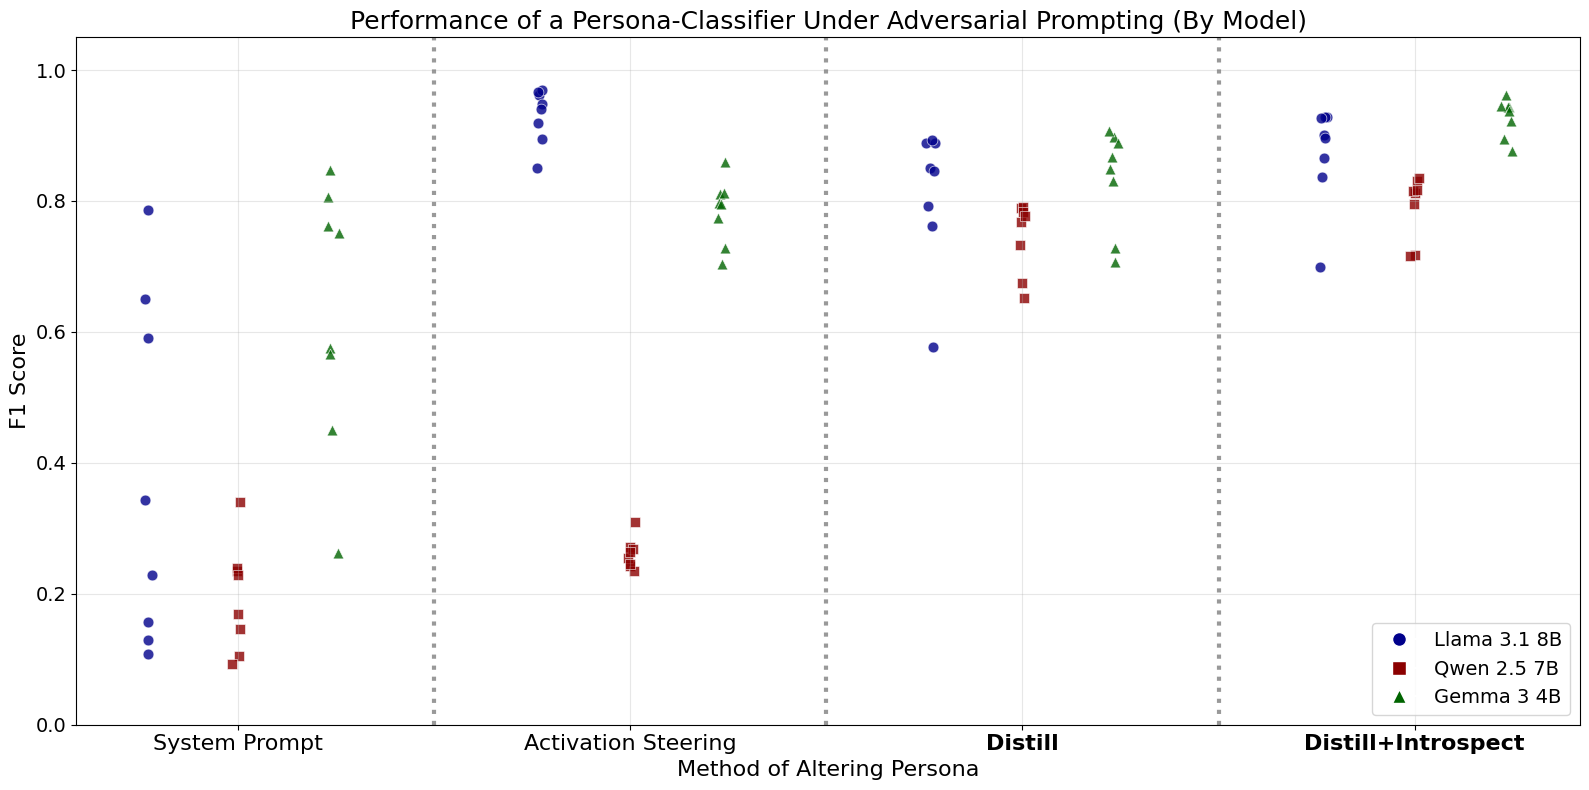

In [10]:
# Separate plot for each model side by side (points only)
plt.figure(figsize=(16, 8))

# Load data for all three models (same as before)
PATH_LLAMA = f"{DATA_PATH}/robustness/llama-3.1-8b-it"
f1_llama = pd.read_json(f"{PATH_LLAMA}/f1.jsonl", orient="records", lines=True)
filtered_f1_llama = f1_llama[~f1_llama["variant"].isin(["default", "all"])]

PATH_QWEN = f"{DATA_PATH}/robustness/qwen-2.5-7b-it"
f1_qwen = pd.read_json(f"{PATH_QWEN}/f1.jsonl", orient="records", lines=True)
filtered_f1_qwen = f1_qwen[~f1_qwen["variant"].isin(["default", "all"])]

PATH_GEMMA = f"{DATA_PATH}/robustness/gemma-3-4b-it"
f1_gemma = pd.read_json(f"{PATH_GEMMA}/f1.jsonl", orient="records", lines=True)
filtered_f1_gemma = f1_gemma[~f1_gemma["variant"].isin(["default", "all"])]

methods = ['prompted', 'steered', 'trained_distillation', 'trained_introspection']
method_labels = ['System Prompt', 'Activation Steering', 'Distill', 'Distill+Introspect']
models = [filtered_f1_llama, filtered_f1_qwen, filtered_f1_gemma]
model_names = ['Llama 3.1 8B', 'Qwen 2.5 7B', 'Gemma 3 4B']

# Create positions for points (3 models per method, with closer spacing within methods)
spacing_within_method = 0.7  # Reduced spacing between models within same method
spacing_between_methods = 3.0  # Increased spacing between different methods

# Add individual points with jitter
for i, method in enumerate(methods):
    for j, (model_data, model_name) in enumerate(zip(models, model_names)):
        method_data = model_data[model_data['method'] == method]['score']
        if len(method_data) > 0:
            base_pos = i * spacing_between_methods + 1
            x_position = base_pos + (j - 1) * spacing_within_method
            x_jitter = np.random.normal(0, 0.02, size=len(method_data))
            
            # Use different markers for each model
            if j == 0:  # Llama
                plt.scatter(x_position + x_jitter, method_data, alpha=0.8, s=60, 
                           color='darkblue', edgecolors='white', linewidth=0.5, marker='o')
            elif j == 1:  # Qwen
                plt.scatter(x_position + x_jitter, method_data, alpha=0.8, s=60, 
                           color='darkred', edgecolors='white', linewidth=0.5, marker='s')
            else:  # Gemma
                plt.scatter(x_position + x_jitter, method_data, alpha=0.8, s=60, 
                           color='darkgreen', edgecolors='white', linewidth=0.5, marker='^')

# Add thick grey dotted lines to separate methods
method_centers = [i * spacing_between_methods + 1 for i in range(len(methods))]
for i in range(len(methods) - 1):
    separator_x = (method_centers[i] + method_centers[i + 1]) / 2
    plt.axvline(x=separator_x, color='grey', linestyle=':', alpha=0.8, linewidth=3)

plt.ylim(0, 1.05)

# Set x-tick labels
ax = plt.gca()
ax.set_xticks(method_centers)
ax.set_xticklabels(method_labels, fontsize=16)

# Make the last two labels bold
for i, label in enumerate(ax.get_xticklabels()):
    if i >= 2:  # Distill and Distill+Introspect
        label.set_fontweight('bold')

# Add model labels as legend with correct colors and markers
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='darkblue', 
                         markersize=10, label='Llama 3.1 8B', markeredgecolor='white'),
                   Line2D([0], [0], marker='s', color='w', markerfacecolor='darkred', 
                         markersize=10, label='Qwen 2.5 7B', markeredgecolor='white'),
                   Line2D([0], [0], marker='^', color='w', markerfacecolor='darkgreen', 
                         markersize=10, label='Gemma 3 4B', markeredgecolor='white')]

plt.xlabel('Method of Altering Persona', fontsize=16)
plt.ylabel('F1 Score', fontsize=16)
plt.title('Performance of a Persona-Classifier Under Adversarial Prompting (By Model)', fontsize=18)
plt.grid(True, alpha=0.3)
plt.tick_params(axis='y', labelsize=14)
plt.legend(handles=legend_elements, fontsize=14, loc='lower right')
plt.tight_layout()
# plt.savefig("/workspace/PersonalityTraining/figures/robustness_by_model.png", dpi=400)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect

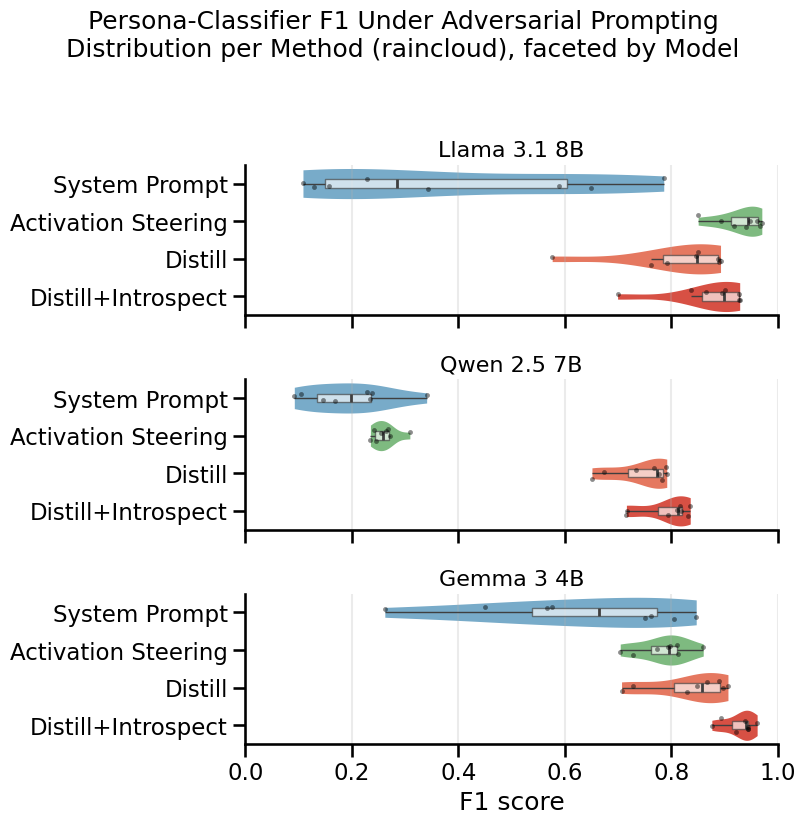

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# Load your data
# ---------------------------

PATH_LLAMA = f"{DATA_PATH}/robustness/llama-3.1-8b-it"
f1_llama = pd.read_json(f"{PATH_LLAMA}/f1.jsonl", orient="records", lines=True)
f1_llama = f1_llama[~f1_llama["variant"].isin(["default", "all"])]
f1_llama["model"] = "Llama 3.1 8B"

PATH_QWEN = f"{DATA_PATH}/robustness/qwen-2.5-7b-it"
f1_qwen = pd.read_json(f"{PATH_QWEN}/f1.jsonl", orient="records", lines=True)
f1_qwen = f1_qwen[~f1_qwen["variant"].isin(["default", "all"])]
f1_qwen["model"] = "Qwen 2.5 7B"

PATH_GEMMA = f"{DATA_PATH}/robustness/gemma-3-4b-it"
f1_gemma = pd.read_json(f"{PATH_GEMMA}/f1.jsonl", orient="records", lines=True)
f1_gemma = f1_gemma[~f1_gemma["variant"].isin(["default", "all"])]
f1_gemma["model"] = "Gemma 3 4B"

df = pd.concat([f1_llama, f1_qwen, f1_gemma], ignore_index=True)

label_map = {
    "prompted": "System Prompt",
    "steered": "Activation Steering",
    "trained_distillation": "Distill",
    "trained_introspection": "Distill+Introspect",
}
df["method_label"] = df["method"].map(label_map)

method_order = ["System Prompt", "Activation Steering", "Distill", "Distill+Introspect"]
model_order  = ["Llama 3.1 8B", "Qwen 2.5 7B", "Gemma 3 4B"]
palette = {
    "System Prompt":        "#6baed6",
    "Activation Steering":  "#74c476",
    "Distill":              "#fb6a4a",
    "Distill+Introspect":   "#ef3b2c",
}

# ---------------------------
# Plot: half-violin (raincloud) + box + jitter, faceted by model
# ---------------------------
sns.set_context("talk")
g = sns.FacetGrid(
    df, row="model", row_order=model_order,
    sharex=True, sharey=True, height=2.8, aspect=3
)

# Violin (distribution shape)
g.map_dataframe(
    sns.violinplot, x="score", y="method_label", order=method_order,
    palette=[palette[m] for m in method_order], cut=0, inner=None,
    linewidth=0, scale="width", orient="h"
)

# Boxplot (median & IQR)
g.map_dataframe(
    sns.boxplot, x="score", y="method_label", order=method_order,
    orient="h", width=0.22, showcaps=False, fliersize=0,
    boxprops={"facecolor": "white", "alpha": 0.65},
    medianprops={"linewidth": 2}, whiskerprops={"linewidth": 1}
)

# Jittered points (individual runs)
g.map_dataframe(
    sns.stripplot, x="score", y="method_label", order=method_order,
    orient="h", jitter=0.18, size=3.5, color="k", alpha=0.45
)

for ax, model in zip(g.axes.flat, model_order):
    ax.set_title(model, fontsize=16)
    ax.set_xlabel("F1 score")
    ax.set_ylabel("")
    ax.set_xlim(0, 1.0)
    ax.grid(axis="x", alpha=0.25)

g.fig.suptitle(
    "Persona-Classifier F1 Under Adversarial Prompting\n"
    "Distribution per Method (raincloud), faceted by Model",
    y=0.99, fontsize=18
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


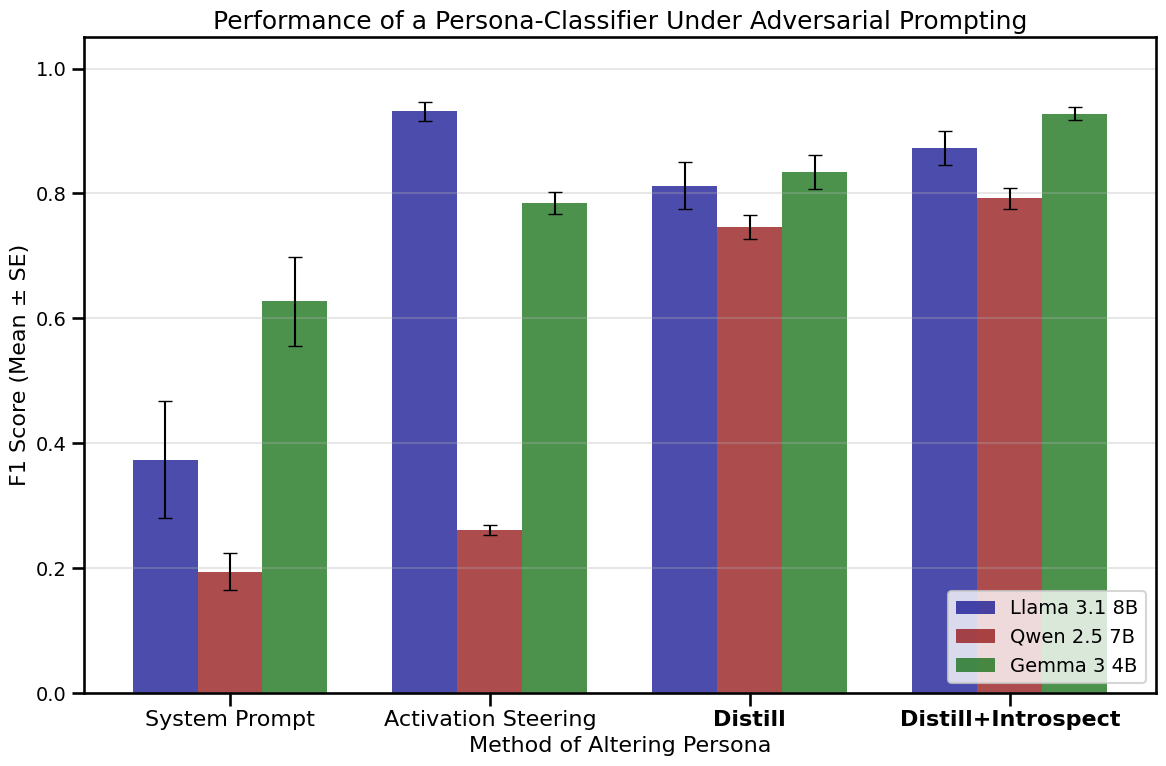

In [21]:
# Combined plot merging results from Llama and Qwen and Gemma
plt.figure(figsize=(12, 8))

# Load data for all three models
PATH_LLAMA = f"{DATA_PATH}/robustness/llama-3.1-8b-it"
f1_llama = pd.read_json(f"{PATH_LLAMA}/f1.jsonl", orient="records", lines=True)
filtered_f1_llama = f1_llama[~f1_llama["variant"].isin(["default", "all"])].copy()
filtered_f1_llama.loc[:, 'model'] = 'Llama 3.1 8B'

PATH_QWEN = f"{DATA_PATH}/robustness/qwen-2.5-7b-it"
f1_qwen = pd.read_json(f"{PATH_QWEN}/f1.jsonl", orient="records", lines=True)
filtered_f1_qwen = f1_qwen[~f1_qwen["variant"].isin(["default", "all"])].copy()
filtered_f1_qwen.loc[:, 'model'] = 'Qwen 2.5 7B'

PATH_GEMMA = f"{DATA_PATH}/robustness/gemma-3-4b-it"
f1_gemma = pd.read_json(f"{PATH_GEMMA}/f1.jsonl", orient="records", lines=True)
filtered_f1_gemma = f1_gemma[~f1_gemma["variant"].isin(["default", "all"])].copy()
filtered_f1_gemma.loc[:, 'model'] = 'Gemma 3 4B'

# Combine data from all three models
combined_f1 = pd.concat([filtered_f1_llama, filtered_f1_qwen, filtered_f1_gemma], ignore_index=True)

# Calculate mean and standard error for each method and model
summary_stats = combined_f1.groupby(['method', 'model'])['score'].agg(['mean', 'sem']).reset_index()

methods = ['prompted', 'steered', 'trained_distillation', 'trained_introspection']
method_labels = ['System Prompt', 'Activation Steering', 'Distill', 'Distill+Introspect']
models = ['Llama 3.1 8B', 'Qwen 2.5 7B', 'Gemma 3 4B']
colors = ['darkblue', 'darkred', 'darkgreen']

# Set up bar positions
x = np.arange(len(methods))
width = 0.25

# Create bars for each model
for i, model in enumerate(models):
    model_data = summary_stats[summary_stats['model'] == model]
    means = [model_data[model_data['method'] == method]['mean'].iloc[0] if len(model_data[model_data['method'] == method]) > 0 else 0 for method in methods]
    sems = [model_data[model_data['method'] == method]['sem'].iloc[0] if len(model_data[model_data['method'] == method]) > 0 else 0 for method in methods]
    
    plt.bar(x + i * width, means, width, label=model, color=colors[i], alpha=0.7, 
            yerr=sems, capsize=5, error_kw={'linewidth': 1.5})

plt.ylim(0, 1.05)
plt.xlabel('Method of Altering Persona', fontsize=16)
plt.ylabel('F1 Score (Mean ± SE)', fontsize=16)
plt.title('Performance of a Persona-Classifier Under Adversarial Prompting', fontsize=18)
plt.grid(True, alpha=0.3, axis='y')

# Set x-tick labels with bold formatting for Distill methods
plt.xticks(x + width, method_labels, fontsize=16)
ax = plt.gca()
for i, label in enumerate(ax.get_xticklabels()):
    if i >= 2:  # Distill and Distill+Introspect
        label.set_fontweight('bold')

plt.tick_params(axis='y', labelsize=14)
plt.legend(fontsize=14, loc='lower right')
plt.tight_layout()
# plt.savefig("/workspace/PersonalityTraining/figures/robustness.png", dpi=400)
plt.show()